# Theoretical Calculations on "Alternating Donor-Acceptor Thienoacenes Featuring Up to 23 Linearly Fused Rings"

This notebook is documenting the theoretical calculations performed performed for the work:

- Jian-Cheng Song, Xin-Yu Tong, Bai-Yang Qian, Jianbin Lin, Pavlo O. Dral, Hui-Jun Zhang. Alternating Donor-Acceptor Thienoacenes Featuring Up to 23 Linearly Fused Rings. *Submitted*.

## Initialize required libraries

In [1]:
import mlatom as ml # tested with the dev version based on MLatom 3.16.3

## Optimized Structures

UAIQM optimizations were done scripts like this one for the [16]ITA molecule:

```python
# Here we use UAIQM method
uaiqm = ml.models.methods(method="uaiqm_gfn2xtbstar@cc")

# Create a molecule object and read the geometry from .xyz file as initial guess
_16ITA = ml.molecule().read_from_xyz_file("predict1.xyz")

# Optimize the molecule using Gaussian optimizer
geomopt = ml.optimize_geometry(model=uaiqm, molecule=_16ITA, program="Gaussian")
# os.rename("gaussian.log", "9ITAb_opt.log")

# Calculate the frequencies for the optimized molecule
ml.freq(model=uaiqm, molecule=_16ITA, program="Gaussian")
# os.rename("gaussian.log", "9ITAb_freq.log")

_16ITA.dump(filename="16ITA.json", format="json")
```

Below we just load the finished calculations from the data file generated by MLatom. See subfolders for the raw input and output files.

### Comparison of complete, 714-atom, crystal and UAIQM-optimized structures

In [63]:
ita16_uaiqm_dimer = ml.molecule.load(filename="16ITA_dimer/opt_freq_full_structure/UAIQM/16ITA.json", format="json")
ita16_uaiqm_dimer.frequencies[0]  # To ensure the UAIQM-optimized structure reachs its true minima.
ita16_uaiqm_dimer.view(width=800, height=300)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
ita16_crystal_dimer = ml.molecule().read_from_xyz_file("experiment/16ITA_crystal_structure/16ITA_crystal_stacked.xyz")
# Calculate RMSD between UAIQM-optimized and crystal structures
rmsd_16ita_dimer = ml.xyz.rmsd(ita16_uaiqm_dimer, ita16_crystal_dimer, reorder="inertia-Hungarian", check_reflection=True)
print(f"RMSD between UAIQM-optimized and crystal dimer structures: {rmsd_16ita_dimer}")

RMSD between UAIQM-optimized and crystal dimer structures: 2.947799021766158


In [6]:
ita16_crystal_dimer.view(width=1000, height=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Comparison of core structures of crystal and UAIQM-optimized [16]ITA

In [13]:
# Calculate the RMSD of core structure (removing flexible alkyl groups) of crystal and UAIQM-optimized [16]ITA
ita16_uaiqm_dimer_core = ml.molecule().read_from_xyz_file("16ITA_dimer/core_structure_of_dimer/16ITA_uaiqm_opted_core.xyz")
ita16_crystal_dimer_core = ml.molecule().read_from_xyz_file("experiment/16ITA_crystal_structure/16ITA_crystal_stacked_core.xyz")
rmsd_core = ml.xyz.rmsd(ita16_uaiqm_dimer_core, ita16_crystal_dimer_core)
print(f"RMSD between core UAIQM-optimized and crystal dimer structures: {rmsd_core:.3f} Angstrom")
ita16_uaiqm_dimer_core.view(width=800, height=600)
ita16_crystal_dimer_core.view(width=800, height=600)

RMSD between core UAIQM-optimized and crystal dimer structures: 1.450 Angstrom


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Comparison of crystal and DFT (M06-2X-D3/def2-SVP)-optimized structure (gas phase) of model [16]ITA compound

In [10]:
ita16_crystal_core = ml.molecule().read_from_xyz_file("experiment/16ITA_crystal_structure/16ITA_crystal_model_compound.xyz")
ita16_crystal_core.view(width=800, height=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
ita16_m062x = ml.molecule.load(filename="16ITA/opt_freq/m06-2x-d3_def2svp/P2.log", format="gaussian")
# Calculate RMSD between structures
rmsd_m062x = ml.xyz.rmsd(ita16_m062x, ita16_crystal_core, reorder="inertia-Hungarian", check_reflection=True)
print(f"RMSD of M062X-optimized wrt crystal: {rmsd_m062x:.3f} Angstrom")
ita16_m062x.view(width=800, height=600)

RMSD of M062X-optimized wrt crystal: 1.479 Angstrom


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Comparison of crystal and UAIQM-optimized structure of model [16]ITA compound

In [17]:
ita16_uaiqm = ml.molecule.load(filename="16ITA/opt_freq/uaiqm/16ITA.json", format="json")
rmsd_uaiqm = ml.xyz.rmsd(ita16_uaiqm, ita16_crystal_core, reorder="inertia-Hungarian", check_reflection=True)
print(f"RMSD of UAIQM-optimized vs crystal structure: {rmsd_uaiqm:.3f} Angstrom")
ita16_uaiqm.view(width=800, height=400)

RMSD of UAIQM-optimized vs crystal structure: 1.263 Angstrom


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The results of RMSD show that the UAIQM-optimized structure is slightly better than the M06-2X optimized structure.

### UAIQM-optimized, gas-phase, model structures of [9]ITAb, [16]ITA, and [23]ITA with the tridecan-7-yl and hexyl groups replaced with methyl groups to accelerate the subsequent TD-DFT calculations

We load the files from the finished calculations. See the corresponding folders containing input and output results. Also see the more detailed summary with coordinates and energies below.

#### [9]ITAb

In [18]:
# We already optimized the geometry with MLatom with UAIQM method.
# Here we just load the json file.
itab9 = ml.molecule.load(filename='9ITAb/opt_freq/uaiqm/9ITAb.json', format='json')

In [20]:
# View the molecule
itab9.view(width=800, height=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [21]:
# Check if we have any imaginary frequencies - the lowest frequency is postive in our case meaning that it is a true minimum
print(min(itab9.frequencies))

9.2464


#### [16]ITA

In [22]:
# We already optimized the geometry with MLatom with UAIQM method.
# Here we just load the json file.
ita16 = ml.molecule.load(filename='16ITA/opt_freq/uaiqm/16ITA.json', format='json')

In [23]:
# View the molecule
ita16.view(width=800, height=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [24]:
# Check if there are any imaginary frequencies
print(min(ita16.frequencies))

3.1085


#### [23]ITA

In [25]:
# We already optimized the geometry with MLatom with UAIQM method.
# Here we just load the json file.
ita23 = ml.molecule.load(filename='23ITA/opt_freq/uaiqm/23ITA.json', format='json')

In [26]:
# View the molecule
ita23.view(width=800, height=400)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [27]:
# Check if there are any imaginary frequencies
print(min(ita23.frequencies))

1.1284


## Simulated UV-vis Spectra and Their Overall Analysis

Here we analyze the TD-DFT results with MLatom based on the Gaussian 16 output files.

The excited-state properties were calculated at TD-CAM-B3LYP/def2-SVP in chloroform using implicit solvent IEFPCM model.

### [9]ITAb

In [33]:
itab9 = ml.molecule.load('9ITAb/uvvis/td-cam-b3lyp_def2svp_on_uaiqm/9ITA_uaiqm.log', format='gaussian')
# Dump the molecule in machine-readable JSON format
#itab9.dump('9ITAb/uvvis/td-cam-b3lyp_def2svp_on_uaiqm/9ITAb_uvvis.json', format='json')
# An example of loading the same molecule from the machine-readable JSON format
#itab9 = ml.molecule.load('9ITAb/uvvis/td-cam-b3lyp_def2svp_on_uaiqm/9ITAb_uvvis.json', format='json')

In [34]:
# Load experimental spectrum for comparison
itab9_uvvis_exp = ml.spectra.uvvis.load(filename='experiment/uvvis_exp/9ITAb_exp.txt')

Theoretical spectrum 1 is shifted by 49.99 nm


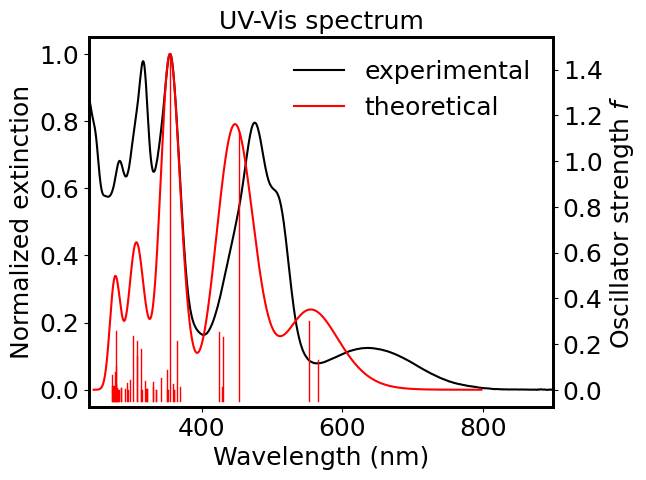

In [35]:
# Plot and compare the experimental and theoretical spectra
ml.spectra.plot_uvvis(spectra=[itab9_uvvis_exp], molecule=itab9,
                              plotstart=240, plotend=900, normalize=True,
                              labels=["experimental", "theoretical"],
                              spc=True, 
                              band_width_slider=False, # You can use "band_width_slider=True" if you want to use slider to adjust band width.
                              shift=True, band_width=0.25)

### [16]ITA

In [36]:
ita16 = ml.molecule.load('16ITA/uvvis/td-cam-b3lyp_def2svp_on_uaiqm/16ITA_uaiqm.log', format='gaussian')

In [38]:
# Load experimental spectrum for comparison
ita16_uvvis_exp = ml.spectra.uvvis.load(filename='experiment/uvvis_exp/16ITA_exp.txt')

Theoretical spectrum 1 is shifted by 53.59 nm


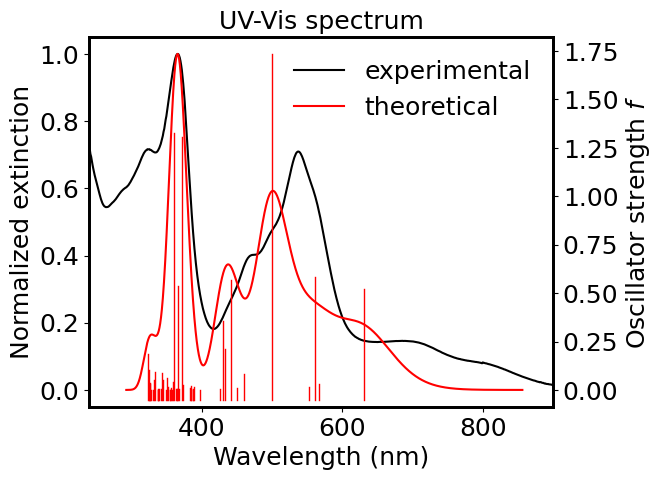

In [39]:
# Plot and compare the experimental and theoretical spectra
ml.spectra.plot_uvvis(spectra=[ita16_uvvis_exp], molecule=ita16,
                              plotstart=240, plotend=900, normalize=True,
                              labels=["experimental", "theoretical"],
                              spc=True, 
                              band_width_slider=False, # You can use "band_width_slider=True" if you want to use slider to adjust band width.
                              shift=True, band_width=0.2)

### Comparing monomer and dimer spectra with experiment

In [40]:
# Load the calculations for dimer at the same level as for monomer
ita16_dimer = ml.molecule.load('16ITA_dimer/uvvis/td-cam-b3lyp_def2svp_on_m06-2x-d3_def2svp/16ITA-dimer.log', format='gaussian')

Theoretical spectrum 1 is shifted by 53.59 nm
Theoretical spectrum 2 is shifted by -95.61 nm


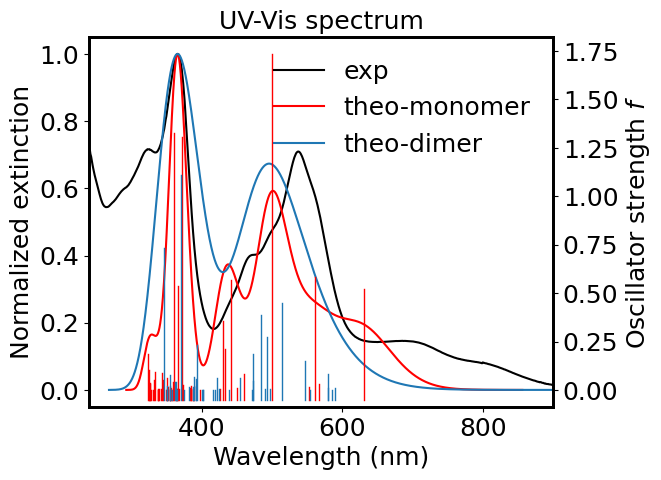

In [42]:
# Plot and compare the experimental and theoretical (both monomer and dimer) spectra
ml.spectra.plot_uvvis(spectra=ita16_uvvis_exp, molecular_database=ml.molecular_database([ita16, ita16_dimer]),
                              plotstart=240, plotend=900, normalize=True,
                              labels=["exp", "theo-monomer", "theo-dimer"],
                              spc=True, band_width_slider=False, shift=True, band_width=0.2)

### [23]ITA

In [43]:
ita23 = ml.molecule.load('23ITA/uvvis/td-cam-b3lyp_def2svp_on_uaiqm/23ITA_uaiqm.log', format='gaussian')

In [45]:
# Load experimental spectrum for comparison
ita23_uvvis_exp = ml.spectra.uvvis.load(filename='experiment/uvvis_exp/23ITA_exp.txt')

Theoretical spectrum 1 is shifted by 56.24 nm


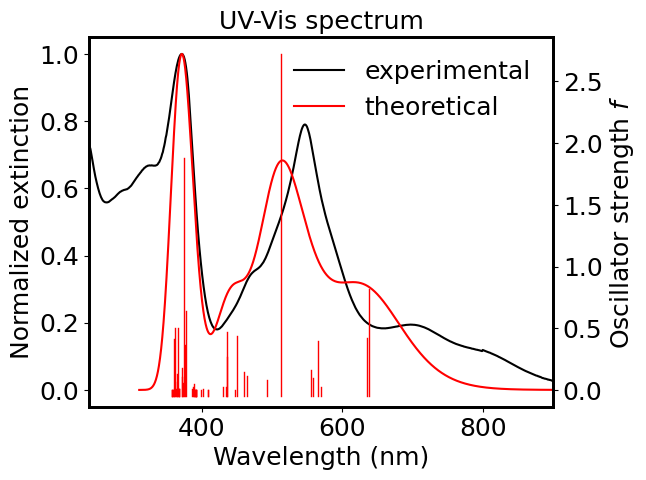

In [46]:
# Plot and compare the experimental and theoretical spectra
ml.spectra.plot_uvvis(spectra=[ita23_uvvis_exp], molecule=ita23,
                              plotstart=240, plotend=900, normalize=True,
                              labels=["experimental", "theoretical"],
                              spc=True, 
                              band_width_slider=False, # You can use "band_width_slider=True" if you want to use slider to adjust band width.
                              shift=True, band_width=0.25)

## Tables With Detailed Results Of Excited-State Calculations

In [49]:
import pandas as pd
from IPython.display import display, HTML
def get_table_mo_contributions(molecule):
    import numpy as np
    ex_strs = []; eVs = []; nms = []; fs = []; max_contribs = []
    for istate, state in enumerate(molecule.electronic_states[1:]):
        abs_coeffs = [abs(contrib['coeff']) for contrib in state.mo_contributions]
        maxcontrib = np.argmax(np.array(abs_coeffs))
        coeff = state.mo_contributions[maxcontrib]['coeff']
        
        unrestricted = {'A': u'\u03B1', 'B': u'\u03B2'}
        fromMO = u''
        nfromMO = 0
        spin = 'all'
        nOMOs = {'all': molecule.n_occ_mos, 'A': 0, 'B': 0}
        nfromMO = state.mo_contributions[maxcontrib]['from']
        fromMO += u'H'
        if nfromMO != nOMOs[spin]:
            fromMO += u'\u2212%d' % abs(nfromMO - nOMOs[spin])
        toMO = u''
        ntoMO = 0
        ntoMO = state.mo_contributions[maxcontrib]['to']
        toMO += u'L'
        if ntoMO != nOMOs[spin]+1:
            toMO += u'%+d' % (ntoMO - nOMOs[spin]-1)
        
        largest_contribution = u'%s \u2192 %s (%.2f)' % (fromMO, toMO, coeff)
        eV = molecule.excitation_energies[istate] * ml.constants.hartree2eV
        nm = ml.constants.eV2nm(eV)
        f = molecule.oscillator_strengths[istate]
        spins = {1: 'S', 2: 'D', 3: 'T', 4: 'Q'}
        mult = state.multiplicity
        ex_str = ''
        if mult in spins.keys():
            ex_str = f'{spins[mult]}{istate+1}'
        else:
            ex_str = f'{istate+1}'
        ex_strs.append(ex_str)
        eVs.append(eV)
        nms.append(nm)
        fs.append(f)
        max_contribs.append(largest_contribution)
    ex_df = pd.DataFrame({'Excitation': ex_strs,
                       'E, eV': eVs,
                       'ùúÜ, nm': nms,
                       'f': fs,
                       'Largest contribution': max_contribs})
    ex_df['E, eV'] = ex_df['E, eV'].apply(lambda x: f'{x:.2f}')
    ex_df['ùúÜ, nm'] = ex_df['ùúÜ, nm'].apply(lambda x: f'{x:.0f}')
    ex_df['f'] = ex_df['f'].apply(lambda x: f'{x:.2f}')
    
    print(f'The excitation energies (E), wavelength (ùúÜ), oscillator strengths (f),\nand the largest Kohn‚ÄìSham molecular orbital transition contributions (in parenthesis)\nfor the key vertical excitations. H ‚Äì denotes HOMO, L ‚Äì LUMO.')
    display(HTML(ex_df.to_html(escape=False, index=False)))

In [50]:
get_table_mo_contributions(itab9)

The excitation energies (E), wavelength (ùúÜ), oscillator strengths (f),
and the largest Kohn‚ÄìSham molecular orbital transition contributions (in parenthesis)
for the key vertical excitations. H ‚Äì denotes HOMO, L ‚Äì LUMO.


In [51]:
get_table_mo_contributions(ita16)

The excitation energies (E), wavelength (ùúÜ), oscillator strengths (f),
and the largest Kohn‚ÄìSham molecular orbital transition contributions (in parenthesis)
for the key vertical excitations. H ‚Äì denotes HOMO, L ‚Äì LUMO.


In [52]:
get_table_mo_contributions(ita16_dimer)

The excitation energies (E), wavelength (ùúÜ), oscillator strengths (f),
and the largest Kohn‚ÄìSham molecular orbital transition contributions (in parenthesis)
for the key vertical excitations. H ‚Äì denotes HOMO, L ‚Äì LUMO.


In [53]:
get_table_mo_contributions(ita23)

The excitation energies (E), wavelength (ùúÜ), oscillator strengths (f),
and the largest Kohn‚ÄìSham molecular orbital transition contributions (in parenthesis)
for the key vertical excitations. H ‚Äì denotes HOMO, L ‚Äì LUMO.


## Cartesian Coordinates, Energies, Number of Imaginary Frequencies of Optimized Structures

Below, we extract the basic information from the calculations. More information is contained in the raw output files and MLatom data formats saved in json files. How to use MLatom to check the calculation results are also shown above and below.

In [54]:
def print_summary(mol):
    import pandas as pd
    import numpy as np
    print(f'Total energy: {mol.energy:.13f} Hartree')
    print(f'ZPE:           {mol.ZPE:.7f} Hartree')
    print(f'H:            {mol.H:.7f} Hartree')
    print(f'G:            {mol.G:.7f} Hartree')
    print()
    nimag = np.sum(np.array(mol.frequencies) < 0)
    print(f'Number of imaginary frequencies: {nimag}')
    if nimag > 0:
        print(f'Lowest 10 frequencies: {mol.frequencies[:10]}')
    print()
    print(f'XYZ coordinates in Angstrom\n')
    with pd.option_context("display.max_rows", None, "display.max_columns", None):
        print(pd.DataFrame(mol.get_xyz_coordinates(), mol.get_element_symbols(), columns=list("XYZ")))
    mol.view(width=600)

### [9]ITAb
#### UAIQM (gas phase)

In [55]:
print_summary(ml.molecule.load('9ITAb/opt_freq/uaiqm/9ITAb.json', format='json'))

Total energy: -2880.6542912731466 Hartree
ZPE:           0.5759070 Hartree
H:            -2880.0267270 Hartree
G:            -2880.1658310 Hartree

Number of imaginary frequencies: 0

XYZ coordinates in Angstrom

           X         Y         Z
C  -9.784601 -0.177590  0.009527
C  -9.741426  1.218930  0.025849
C  -8.517872  1.863018  0.026075
C  -7.314531  1.133155  0.010039
C  -7.346656 -0.287956 -0.004714
C  -8.611753 -0.912660 -0.004986
C  -6.079071  1.799296  0.008143
C  -4.918990  1.052796 -0.012750
C  -4.905931 -0.377675 -0.027738
C  -6.146255 -1.038907 -0.018157
C  -6.243985 -2.516387 -0.014666
N  -7.514715 -3.079034 -0.034465
C  -8.719877 -2.386352 -0.022807
C  -8.493384  3.345757  0.043329
N  -7.233072  3.944116  0.041891
C  -6.021806  3.269272  0.025251
O  -9.790192 -2.960818 -0.026026
O  -5.273706 -3.253647  0.006840
O  -9.510870  4.007482  0.058231
O  -4.965747  3.880282  0.025121
S  -3.268335  1.785521 -0.026035
C  -2.546472  0.085492 -0.062554
C  -3.554416 -0.861645 -0.05

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

#### M06-2X-D3/def2-SVP (chloroform, IEFPCM implicit solvent model)

In [56]:
print_summary(ml.molecule.load('9ITAb/opt_freq/m06-2x-d3_def2svp/P1_opt_freq.log', format='gaussian'))

Total energy: -4175.5836922999997 Hartree
ZPE:           0.5866200 Hartree
H:            -4174.9468960 Hartree
G:            -4175.0825450 Hartree

Number of imaginary frequencies: 0

XYZ coordinates in Angstrom

           X         Y         Z
C  -9.420476 -1.080682  0.151336
C  -9.247007 -2.457433 -0.096246
C  -7.976960 -2.979667 -0.212760
C  -6.838985 -2.143450 -0.085470
C  -7.004752 -0.756561  0.163241
C  -8.327216 -0.249932  0.277778
C  -5.542459 -2.682129 -0.204495
C  -4.443746 -1.848615 -0.072945
C  -4.580037 -0.429232  0.181547
C  -5.878420  0.093203  0.293160
C  -6.115975  1.539320  0.543935
N  -7.428526  1.987844  0.654501
C  -8.566476  1.195161  0.538879
C  -7.819105 -4.438850 -0.475004
N  -6.510234 -4.911470 -0.583037
C  -5.366129 -4.132675 -0.465840
O  -9.679330  1.656409  0.643641
O  -5.212288  2.338684  0.654452
O  -8.770362 -5.175742 -0.588697
O  -4.267745 -4.634791 -0.575271
S  -2.788144 -2.375002 -0.189837
C  -2.238848 -0.744114  0.093640
C  -3.261526  0.167610  0.27

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### [16]ITA
#### UAIQM (gas phase)

In [57]:
print_summary(ml.molecule.load('16ITA/opt_freq/uaiqm/16ITA.json', format='json'))

Total energy: -5590.3539568713168 Hartree
ZPE:           1.3574050 Hartree
H:            -5588.8875060 Hartree
G:            -5589.1542260 Hartree

Number of imaginary frequencies: 0

XYZ coordinates in Angstrom

           X         Y         Z
C   6.162085  0.620999  0.276480
C   7.315612 -0.177465  0.179501
C   8.541732  0.505237  0.091133
C   8.583483  1.924757  0.122763
C   7.448377  2.712837  0.250282
C   6.239317  2.035389  0.308949
C  -2.455671 -0.713194  0.300452
C  -2.388579  0.709404  0.276974
C  -1.205387  1.417280  0.333467
C   0.019323  0.726656  0.385289
C  -0.013567 -0.700981  0.374088
C  -1.237765 -1.409423  0.364525
C   1.242945  1.433878  0.437411
C   2.462875  0.738712  0.416379
C   2.397006 -0.683345  0.365501
C   1.212920 -1.390258  0.362042
C   1.266145 -2.854184  0.321579
N   0.042658 -3.501983  0.376490
C  -1.206618 -2.884175  0.444894
C  -1.255371  2.882282  0.311518
N  -0.033721  3.527631  0.421634
C   1.211174  2.907241  0.529003
O  -2.199803 -3.573773  0.56

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

#### M06-2X-D3/def2-SVP (chloroform, IEFPCM implicit solvent model)

In [58]:
print_summary(ml.molecule.load('16ITA/opt_freq/m06-2x-d3_def2svp/P2.log', format='gaussian'))

Total energy: -8180.3091033000001 Hartree
ZPE:           1.3776190 Hartree
H:            -8178.8248660 Hartree
G:            -8179.0875810 Hartree

Number of imaginary frequencies: 0

XYZ coordinates in Angstrom

           X         Y         Z
C   5.996855 -0.702954 -0.022962
C   7.161886  0.068888  0.146097
C   8.354992 -0.637957  0.385021
C   8.368058 -2.062988  0.411810
C   7.218398 -2.821373  0.214566
C   6.031927 -2.123873  0.009382
C  -2.526041  0.758007 -0.726724
C  -2.517716 -0.686607 -0.661594
C  -1.340151 -1.415889 -0.637112
C  -0.089520 -0.750025 -0.624611
C  -0.076098  0.674119 -0.639490
C  -1.286436  1.412552 -0.728013
C   1.122527 -1.488916 -0.585826
C   2.357500 -0.834017 -0.483653
C   2.345996  0.612165 -0.449963
C   1.171487  1.340116 -0.550825
C   1.234014  2.819275 -0.527071
N   0.032298  3.493621 -0.700013
C  -1.215158  2.889252 -0.858206
C  -1.405555 -2.894260 -0.584186
N  -0.193106 -3.570853 -0.624567
C   1.063377 -2.967857 -0.686915
O  -2.184947  3.573822 -1.09

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### [16]ITA dimer

#### UAIQM (gas phase)

In [59]:
print_summary(ml.molecule.load('16ITA_dimer/opt_freq_full_structure/UAIQM/16ITA.json', format='json'))

Total energy: -15734.0188782000005 Hartree
ZPE:           5.9893260 Hartree
H:            -15727.6606340 Hartree
G:            -15728.4939750 Hartree

Number of imaginary frequencies: 0

XYZ coordinates in Angstrom

           X          Y          Z
C  10.438933   8.912631  22.982060
C   9.621862   9.161165  24.083768
C   9.622306   8.237726  25.129549
H   8.977281   8.416515  25.980093
C  10.432818   7.108712  25.082457
H  10.420497   6.398379  25.897210
C  11.250495   6.884324  23.979277
H  11.875423   5.998094  23.939618
C  11.261889   7.780840  22.908259
C  12.145122   7.531714  21.699128
H  11.959372   8.322373  20.969300
C  13.628547   7.627138  22.063377
H  13.842838   8.607296  22.497201
H  13.916931   6.863629  22.789048
H  14.257016   7.505599  21.176961
C  11.774280   6.210866  21.021938
H  10.728345   6.235702  20.699860
H  12.401470   6.034338  20.143057
H  11.895764   5.373805  21.709842
C   8.733438  10.400293  24.127955
H   9.245225  11.137098  23.491296
C   7.362797  

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### [23]ITA
#### UAIQM (gas phase)

In [60]:
print_summary(ml.molecule.load('23ITA/opt_freq/uaiqm/23ITA.json', format='json'))

Total energy: -8300.0535580122178 Hartree
ZPE:           2.1388300 Hartree
H:            -8297.7483090 Hartree
G:            -8298.1431700 Hartree

Number of imaginary frequencies: 0

XYZ coordinates in Angstrom

           X         Y         Z
C  13.451573 -2.126277 -0.323418
C  14.636865 -2.846589 -0.347264
C  15.805326 -2.098113 -0.358870
C  15.815694 -0.677895 -0.384008
C  14.610846  0.047199 -0.388006
C  13.426548 -0.709755 -0.345234
C  -9.734728 -0.680450  0.087780
C  -9.725692  0.743788  0.074462
C  -8.574731  1.498705  0.160154
C  -7.327700  0.860142  0.288310
C  -7.302060 -0.567899  0.290796
C  -8.490131 -1.325887  0.173305
C  -6.139947  1.618335  0.408184
C  -4.895588  0.973310  0.499105
C  -4.903539 -0.451470  0.503806
C  -6.054169 -1.206347  0.413977
C  -5.943685 -2.667263  0.450191
N  -7.131683 -3.364417  0.300247
C  -8.393792 -2.798424  0.116018
C  -8.684458  2.959389  0.113350
N  -7.496994  3.657095  0.263576
C  -6.235723  3.090898  0.455108
O  -9.345075 -3.528519 -0.07

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

#### M06-2X-D3/def2-SVP (chloroform, IEFPCM implicit solvent model)

In [61]:
print_summary(ml.molecule.load('23ITA/opt_freq/m06-2x-d3_def2svp/P3.log', format='gaussian'))

Total energy: -12185.0341828000001 Hartree
ZPE:           2.1691240 Hartree
H:            -12182.7023100 Hartree
G:            -12183.0911140 Hartree

Number of imaginary frequencies: 0

XYZ coordinates in Angstrom

           X         Y         Z
C -12.651848 -1.319318  1.323080
C -13.819821 -2.032147  1.575132
C -14.994230 -1.295803  1.688469
C -15.022146  0.124862  1.566474
C -13.840550  0.847771  1.317675
C -12.655610  0.096193  1.196387
C  10.212618  0.035854 -1.431552
C  10.219277  1.475419 -1.572130
C   9.049424  2.212109 -1.661870
C   7.791446  1.560224 -1.639442
C   7.762186  0.144261 -1.484603
C   8.965545 -0.601817 -1.367086
C   6.588285  2.305557 -1.762756
C   5.340989  1.668883 -1.696379
C   5.334070  0.230933 -1.541166
C   6.503729 -0.506121 -1.452521
C   6.419378 -1.978212 -1.318204
N   7.620492 -2.657458 -1.165580
C   8.883109 -2.065351 -1.134733
C   9.132056  3.685767 -1.781396
N   7.931404  4.363732 -1.945637
C   6.670964  3.768273 -1.998914
O   9.857029 -2.750843 -0

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol